In [1]:
!pip install -U pathway
!pip install -U bokeh
 # Installing pathway

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 7.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of boto3 to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.6/777.6 kB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.6/244.6 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.1/319.1 kB 

In [2]:
#importing all important libraries
import numpy as np
import pandas as pd
import datetime
from datetime import datetime
import pathway as pw
import bokeh.plotting
import panel as pn
import matplotlib.pyplot as plt
from datetime import timedelta
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource
output_notebook()

In [3]:
import pandas as pd
import os

# Load full dataset
df = pd.read_csv("/content/dataset (3).csv")

# Combine the 'LastUpdatedDate' and 'LastUpdatedTime' columns into a single datetime column
df['Timestamp'] = pd.to_datetime(df['LastUpdatedDate'] + ' ' + df['LastUpdatedTime'],
                                  format='%d-%m-%Y %H:%M:%S')

# Sort the DataFrame by the new 'Timestamp' column and reset the index
df = df.sort_values('Timestamp').reset_index(drop=True)
#encoding vehicle type ( bike : 0.5, car : 1, truck:1.5, 'cycle': 0.1)
vehicle_type_mapping = {'bike': 0.5, 'car': 1, 'truck': 1.5,'cycle':0.1}
df['VehicleTypeEncoded'] = df['VehicleType'].map(vehicle_type_mapping).fillna(-1).astype(float)
#encoding traffic condition
traffic_condition_mapping = {'low': 0, 'average': 1, 'high': 1.5}
df['TrafficConditionEncoded'] = df['TrafficConditionNearby'].map(traffic_condition_mapping).fillna(-1).astype(float)


# Create output directory
os.makedirs("garages", exist_ok=True)

# Group by unique garage locations (Lat, Long)
for (lat, lon), group in df.groupby(["Latitude", "Longitude"]):
    filename = f"garages/garage_{lat:.5f}_{lon:.5f}.csv"
    group.to_csv(filename, index=False)

print("✅ Done splitting into garage-wise files.")

✅ Done splitting into garage-wise files.


In [4]:
df['VehicleType'].value_counts()

,count
VehicleType,
car,11166
bike,3624
truck,1809
cycle,1769


In [5]:
df['TrafficConditionNearby'].value_counts()

,count
TrafficConditionNearby,
low,7793
average,6438
high,4137


In [6]:
file = pd.read_csv('/content/garages/garage_20.00003_78.00000.csv')
file

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,Timestamp,VehicleTypeEncoded,TrafficConditionEncoded
0,3936,BHMMBMMBX01,687,20.000035,78.000003,264,car,low,2,0,04-10-2016,07:59:00,2016-10-04 07:59:00,1.0,0.0
1,3937,BHMMBMMBX01,687,20.000035,78.000003,302,car,low,1,0,04-10-2016,08:25:00,2016-10-04 08:25:00,1.0,0.0
2,3938,BHMMBMMBX01,687,20.000035,78.000003,346,truck,low,2,0,04-10-2016,08:59:00,2016-10-04 08:59:00,1.5,0.0
3,3939,BHMMBMMBX01,687,20.000035,78.000003,414,truck,low,2,0,04-10-2016,09:32:00,2016-10-04 09:32:00,1.5,0.0
4,3940,BHMMBMMBX01,687,20.000035,78.000003,485,car,low,3,0,04-10-2016,09:59:00,2016-10-04 09:59:00,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,5243,BHMMBMMBX01,687,20.000035,78.000003,668,bike,average,5,0,19-12-2016,14:30:00,2016-12-19 14:30:00,0.5,1.0
1308,5244,BHMMBMMBX01,687,20.000035,78.000003,642,car,low,3,0,19-12-2016,15:03:00,2016-12-19 15:03:00,1.0,0.0
1309,5245,BHMMBMMBX01,687,20.000035,78.000003,608,cycle,average,3,0,19-12-2016,15:29:00,2016-12-19 15:29:00,0.1,1.0
1310,5246,BHMMBMMBX01,687,20.000035,78.000003,571,car,low,2,0,19-12-2016,16:03:00,2016-12-19 16:03:00,1.0,0.0


In [7]:
file['IsSpecialDay'].value_counts()

,count
IsSpecialDay,
0,1114
1,198


In [8]:
df['QueueLength'].max()

15

In [9]:
import pandas as pd
from math import radians, sin, cos, sqrt, asin


# Step 1: Group by garage code to get one row per garage
garages = df.groupby('SystemCodeNumber')[['Latitude', 'Longitude']].first().reset_index()

# Step 2: Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2)**2
    c = 2 * asin(sqrt(a))
    return R * c

# Step 3: Empty distance matrix
codes = garages['SystemCodeNumber'].tolist()
distance_matrix = pd.DataFrame(index=codes, columns=codes)

# Step 4: Fill the matrix
for i, row1 in garages.iterrows():
    for j, row2 in garages.iterrows():
        dist = haversine(row1['Latitude'], row1['Longitude'], row2['Latitude'], row2['Longitude'])
        distance_matrix.at[row1['SystemCodeNumber'], row2['SystemCodeNumber']] = round(dist, 2)

# Convert to float (optional)
distance_matrix = distance_matrix.astype(float)

# Show top 5 rows
distance_matrix

,BHMBCCMKT01,BHMBCCTHL01,BHMEURBRD01,BHMMBMMBX01,BHMNCPHST01,BHMNCPNST01,Broad Street,Others-CCCPS105a,Others-CCCPS119a,Others-CCCPS135a,Others-CCCPS202,Others-CCCPS8,Others-CCCPS98,Shopping
BHMBCCMKT01,0.00,0.01,0.60,1561.11,0.72,0.72,0.88,0.87,0.88,0.88,0.88,0.88,0.88,0.71
BHMBCCTHL01,0.01,0.00,0.60,1561.11,0.72,0.72,0.87,0.88,0.89,0.88,0.88,0.89,0.89,0.72
BHMEURBRD01,0.60,0.60,0.00,1561.61,1.31,1.31,1.24,1.16,1.16,1.16,1.16,1.16,1.16,0.62
BHMMBMMBX01,1561.11,1561.11,1561.61,0.00,1560.44,1560.44,1561.27,1560.49,1560.49,1560.49,1560.49,1560.49,1560.49,1561.13
BHMNCPHST01,0.72,0.72,1.31,1560.44,0.00,0.00,1.02,0.88,0.89,0.88,0.88,0.89,0.89,1.19
BHMNCPNST01,0.72,0.72,1.31,1560.44,0.00,0.00,1.03,0.88,0.89,0.88,0.88,0.89,0.88,1.19
Broad Street,0.88,0.87,1.24,1561.27,1.02,1.03,0.00,1.67,1.68,1.68,1.68,1.68,1.68,1.58
Others-CCCPS105a,0.87,0.88,1.16,1560.49,0.88,0.88,1.67,0.00,0.01,0.01,0.01,0.01,0.01,0.64
Others-CCCPS119a,0.88,0.89,1.16,1560.49,0.89,0.89,1.68,0.01,0.00,0.01,0.01,0.00,0.00,0.65
Others-CCCPS135a,0.88,0.88,1.16,1560.49,0.88,0.88,1.68,0.01,0.01,0.00,0.00,0.01,0.00,0.64


MODEL 1

In [10]:
import os
from datetime import timedelta
import pathway as pw
import panel as pn
import bokeh.plotting

pn.extension()
all_viz = []

garage_files = os.listdir("garages")
os.makedirs("model1", exist_ok=True)

# For multiple pipelines, each pipeline inside function
for file in garage_files:
    path = f"garages/{file}"
    print(f"▶️ Running for: {file}")

    def build_graph(path, garage_name):
        class Schema(pw.Schema):
            Timestamp: str
            Occupancy: int
            Capacity: int

        data = pw.demo.replay_csv(path, schema=Schema, input_rate=100)

        data = data.with_columns(
            t = data.Timestamp.dt.strptime("%Y-%m-%d %H:%M:%S")
        )

        data = data.with_columns(
            t = pw.apply(lambda t: t.replace(minute=(t.minute // 30) * 30, second=0, microsecond=0), pw.this.t)
        )

        base = data.select(
            t = pw.this.t,
            occupancy = pw.this.Occupancy,
            capacity = pw.this.Capacity
        )

        prev_occ = base.with_columns(
            t_shifted = pw.apply(lambda t: t + timedelta(minutes=30), pw.this.t)
        ).select(
            t = pw.this.t_shifted,
            prev_occupancy = pw.this.occupancy
        )

        joined = base.join(
            prev_occ,
            pw.left.t == pw.right.t,
            how=pw.JoinMode.LEFT
        ).select(
            t = pw.left.t,
            occupancy = pw.left.occupancy,
            capacity = pw.left.capacity,
            prev_occupancy = pw.right.prev_occupancy
        )

        joined = joined.with_columns(
            prev_occupancy_clean = pw.if_else(
                pw.this.prev_occupancy.is_none(),
                pw.this.occupancy,
                pw.this.prev_occupancy
            )
        )

        joined = joined.with_columns(
            delta = (pw.this.occupancy - pw.this.prev_occupancy_clean) / pw.this.capacity
        )

        prev_price_table = joined.with_columns(
            price_temp = 10.0
        ).with_columns(
            t_shifted = pw.apply(lambda t: t + timedelta(minutes=30), pw.this.t)
        ).select(
            t = pw.this.t_shifted,
            prev_price = pw.this.price_temp
        )

        joined = joined.join(
            prev_price_table,
            pw.left.t == pw.right.t,
            how=pw.JoinMode.LEFT
        ).select(
            t = pw.left.t,
            occupancy = pw.left.occupancy,
            capacity = pw.left.capacity,
            delta = pw.left.delta,
            prev_price = pw.right.prev_price
        )
        beta = 2
        alpha = 10
        initial_price = 10

        joined = joined.with_columns(
            prev_price_clean = pw.if_else(
                pw.this.prev_price.is_none(),
                initial_price,
                pw.this.prev_price
            )
        )

        joined = joined.with_columns(
            price = pw.this.prev_price_clean + alpha * pw.this.delta + beta*(pw.this.occupancy/pw.this.capacity)
        )

        final_price_table = joined.select(
            timestam = pw.this.t,
            price = pw.this.price,
            occupancy = pw.this.occupancy,
            capacity = pw.this.capacity,
        )

        export_name = file.replace(".csv", "_model1_output.csv")
        pw.io.csv.write(final_price_table, f"model1/{export_name}")

        def price_plotter(source):
            fig = bokeh.plotting.figure(
                height=300,
                width=700,
                title=f"Garage: {garage_name} (Model 1)",
                x_axis_type="datetime",
            )
            fig.line("timestam", "price", source=source, line_width=2, color="green")
            fig.scatter("timestam", "price", source=source, size=6, color="orange")
            return fig

        return final_price_table.plot(price_plotter, sorting_col="timestam")

    # Add this garage's graph
    all_viz.append(build_graph(path, file))

# Combine all visualisations
pn.Column(*all_viz).servable()

▶️ Running for: garage_26.14749_91.72800.csv


/usr/local/lib/python3.11/dist-packages/beartype/_util/hint/pep/utilpeptest.py:311: BeartypeDecorHintPep585DeprecationWarning: PEP 484 type hint typing.Iterable[pathway.internals.expression.ColumnReference] deprecated by PEP 585. This hint is scheduled for removal in the first Python version released after October 5th, 2025. To resolve this, import this hint from "beartype.typing" rather than "typing". For further commentary and alternatives, see also:
    https://beartype.readthedocs.io/en/latest/api_roar/#pep-585-deprecations
  warn(


▶️ Running for: garage_26.14005_91.73097.csv
▶️ Running for: garage_26.15050_91.73353.csv
▶️ Running for: garage_26.14750_91.72800.csv
▶️ Running for: garage_26.14750_91.72798.csv
▶️ Running for: garage_26.14755_91.72800.csv
▶️ Running for: garage_20.00003_78.00000.csv
▶️ Running for: garage_26.14001_91.73100.csv
▶️ Running for: garage_26.14754_91.72797.csv
▶️ Running for: garage_26.14902_91.73950.csv
▶️ Running for: garage_26.14449_91.73621.csv
▶️ Running for: garage_26.14454_91.73617.csv
▶️ Running for: garage_26.14747_91.72805.csv
▶️ Running for: garage_26.13796_91.74099.csv


Column
    [0] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [1] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [2] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [3] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [4] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [5] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [6] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [7] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [8] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [9] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [10] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [11] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [12] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [13] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)

In [11]:
pw.run()

Output()

MODEL 2

In [12]:
import os
from datetime import timedelta
import pathway as pw
import panel as pn
import bokeh.plotting
import math

pn.extension()
all_viz = []

garage_files = os.listdir("garages")
os.makedirs("model2", exist_ok=True)
# For multiple pipelines, you must build each inside a distinct function
for file in garage_files:
    path = f"garages/{file}"
    print(f"▶️ Running for: {file}")

    def build_graph(path, garage_name):
        class Schema(pw.Schema):
            Timestamp: str
            Occupancy: float
            Capacity: float
            QueueLength: float
            TrafficConditionEncoded: float
            IsSpecialDay: int
            VehicleTypeEncoded: float

        data = pw.demo.replay_csv(path, schema=Schema, input_rate=100)

        data = data.with_columns(
            t = data.Timestamp.dt.strptime("%Y-%m-%d %H:%M:%S")
        )

        data = data.with_columns(
            t = pw.apply(lambda t: t.replace(minute=(t.minute // 30) * 30, second=0, microsecond=0), pw.this.t)
        )

        base = data.select(
            t = pw.this.t,
            occupancy = pw.this.Occupancy,
            capacity = pw.this.Capacity,
            Queue = pw.this.QueueLength,
            Traffic = pw.this.TrafficConditionEncoded,
            IsSpecial = pw.this.IsSpecialDay,
            VehicleType = pw.this.VehicleTypeEncoded
        )

        prev_occ = base.with_columns(
            t_shifted = pw.apply(lambda t: t + timedelta(minutes=30), pw.this.t)
        ).select(
            t = pw.this.t_shifted,
            prev_occupancy = pw.this.occupancy
        )

        joined = base.join(
            prev_occ,
            pw.left.t == pw.right.t,
            how=pw.JoinMode.LEFT
        ).select(
            t = pw.left.t,
            occupancy = pw.left.occupancy,
            capacity = pw.left.capacity,
            prev_occupancy = pw.right.prev_occupancy,
            Queue = pw.left.Queue,
            Traffic = pw.left.Traffic,
            IsSpecial = pw.left.IsSpecial,
            VehicleType = pw.left.VehicleType
        )

        joined = joined.with_columns(
            prev_occupancy_clean = pw.if_else(
                pw.this.prev_occupancy.is_none(),
                pw.this.occupancy,
                pw.this.prev_occupancy
            )
        )
        joined = joined.with_columns(
               delta = (pw.this.occupancy - pw.this.prev_occupancy_clean) / pw.this.capacity,
            occupancy_rate = pw.this.occupancy / pw.this.capacity
        )

        max_queue = 15

        joined = joined.with_columns(
            f_occ = pw.apply(lambda occ_rate: 1 / (1 + math.exp(-10 * (occ_rate - 1))), pw.this.occupancy_rate),
            f_queue = pw.apply(lambda q: math.log(1 + q) / math.log(1 + max_queue), pw.this.Queue),
            f_special = pw.if_else(
                pw.this.IsSpecial==1,
                1.5,
                1.0),
            f_traffic = pw.this.Traffic,
            vehicle_weight = pw.this.VehicleType
        )

        joined = joined.with_columns(
            demand_factor = pw.apply(
                lambda f_occ, f_queue, f_traffic, delta, f_special, vehicle_weight : (
                    (3 * f_occ + f_queue + 1.2 * f_traffic + 10 * delta) * f_special * vehicle_weight
                ),
                pw.this.f_occ,
                pw.this.f_queue,
                pw.this.f_traffic,
                pw.this.delta,
                pw.this.f_special,
                pw.this.vehicle_weight
            )
        )
        prev_price_table = joined.with_columns(
            price_temp = 10.0  # dummy column to initialize
        ).with_columns(
            t_shifted = pw.apply(lambda t: t + timedelta(minutes=30), pw.this.t)
            ).select(
            t = pw.this.t_shifted,
            prev_price = pw.this.price_temp
        )

        joined = joined.join(
            prev_price_table,
            pw.left.t == pw.right.t,
            how=pw.JoinMode.LEFT
            ).select(
            t = pw.left.t,
            occupancy = pw.left.occupancy,
            capacity = pw.left.capacity,
            delta = pw.left.delta,
            prev_price = pw.right.prev_price,
            demand_factor = pw.left.demand_factor,
            Queue = pw.left.Queue,
            Traffic = pw.left.Traffic,
            IsSpecial = pw.left.IsSpecial,
            VehicleType = pw.left.VehicleType
        )
        initial_price = 10
        joined = joined.with_columns(
            prev_price_clean = pw.if_else(
                pw.this.prev_price.is_none(),
                initial_price,
                pw.this.prev_price
            )
        )

        joined = joined.with_columns(
            price = pw.apply(lambda p,d: p * (1 + 0.06 * d),pw.this.prev_price_clean, pw.this.demand_factor)
        )

        final_price_table = joined.select(
            timestam = pw.this.t,
            price = pw.this.price
        )


        export_table = joined.select(
        timestam = pw.this.t,
        price = pw.this.price,
        isspeciadday = pw.this.IsSpecial,
        traffic_condition = pw.this.Traffic,
        vehicle_type = pw.this.VehicleType,
        occupancy = pw.this.occupancy,
        capacity = pw.this.capacity
       )
        export_name = file.replace(".csv", "_output.csv")
        pw.io.csv.write(export_table, f"model2/{export_name}")

        def price_plotter(source):
            fig = bokeh.plotting.figure(
                height=300,
                width=700,
                title=f"Garage: {garage_name}",
                x_axis_type="datetime",
            )
            fig.line("timestam", "price", source=source, line_width=2, color="navy")
            fig.scatter("timestam", "price", source=source, size=6, color="red")
            return fig

        return final_price_table.plot(price_plotter, sorting_col="timestam")

    # Add each garage's panel to list
    all_viz.append(build_graph(path, file))

# Combine ALL graphs into one display
pn.Column(*all_viz).servable()



▶️ Running for: garage_26.14749_91.72800.csv
▶️ Running for: garage_26.14005_91.73097.csv
▶️ Running for: garage_26.15050_91.73353.csv
▶️ Running for: garage_26.14750_91.72800.csv
▶️ Running for: garage_26.14750_91.72798.csv
▶️ Running for: garage_26.14755_91.72800.csv
▶️ Running for: garage_20.00003_78.00000.csv
▶️ Running for: garage_26.14001_91.73100.csv
▶️ Running for: garage_26.14754_91.72797.csv
▶️ Running for: garage_26.14902_91.73950.csv
▶️ Running for: garage_26.14449_91.73621.csv
▶️ Running for: garage_26.14454_91.73617.csv
▶️ Running for: garage_26.14747_91.72805.csv
▶️ Running for: garage_26.13796_91.74099.csv


Column
    [0] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [1] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [2] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [3] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [4] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [5] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [6] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [7] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [8] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [9] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [10] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [11] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [12] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [13] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)

In [13]:
pw.run()

Output()

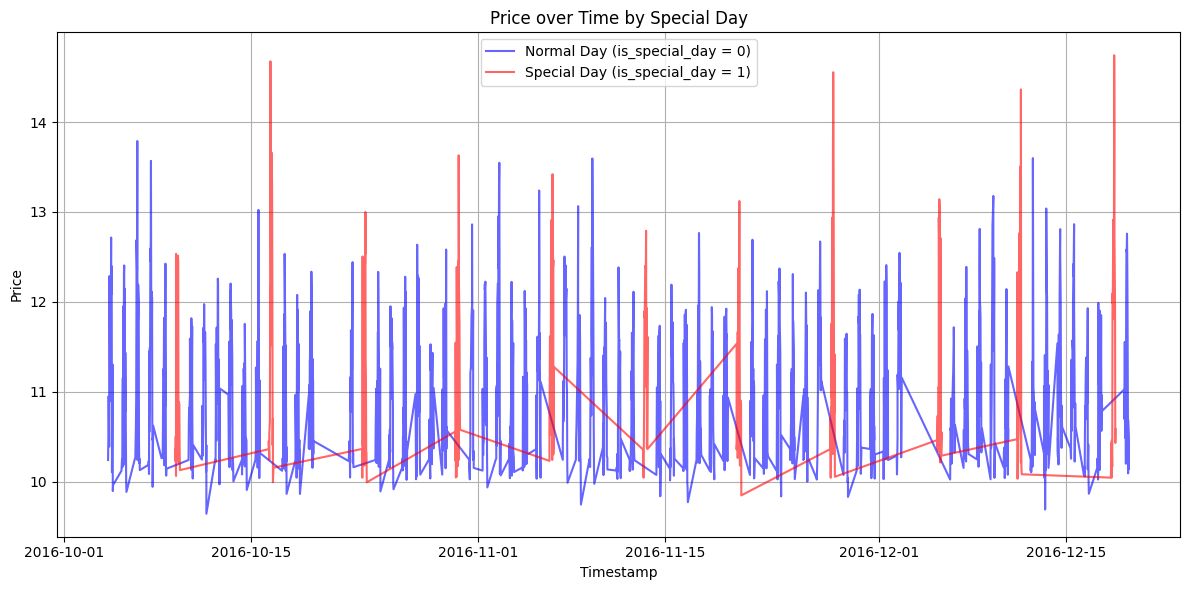

In [14]:
file = pd.read_csv('/content/model2/garage_20.00003_78.00000_output.csv')
import pandas as pd
import matplotlib.pyplot as plt


file['timestam'] = pd.to_datetime(file['timestam'], errors='coerce')
file = file.sort_values('timestam')


# Separate based on is_special_day
normal_day = file[file['isspeciadday'] == 0]
special_day = file[file['isspeciadday'] == 1]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(normal_day['timestam'], normal_day['price'], label='Normal Day (is_special_day = 0)', color='blue', alpha=0.6)
plt.plot(special_day['timestam'], special_day['price'], label='Special Day (is_special_day = 1)', color='red', alpha=0.6)

# Formatting
plt.title('Price over Time by Special Day')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
file["isspeciadday"].value_counts()

,count
isspeciadday,
0,1292
1,241


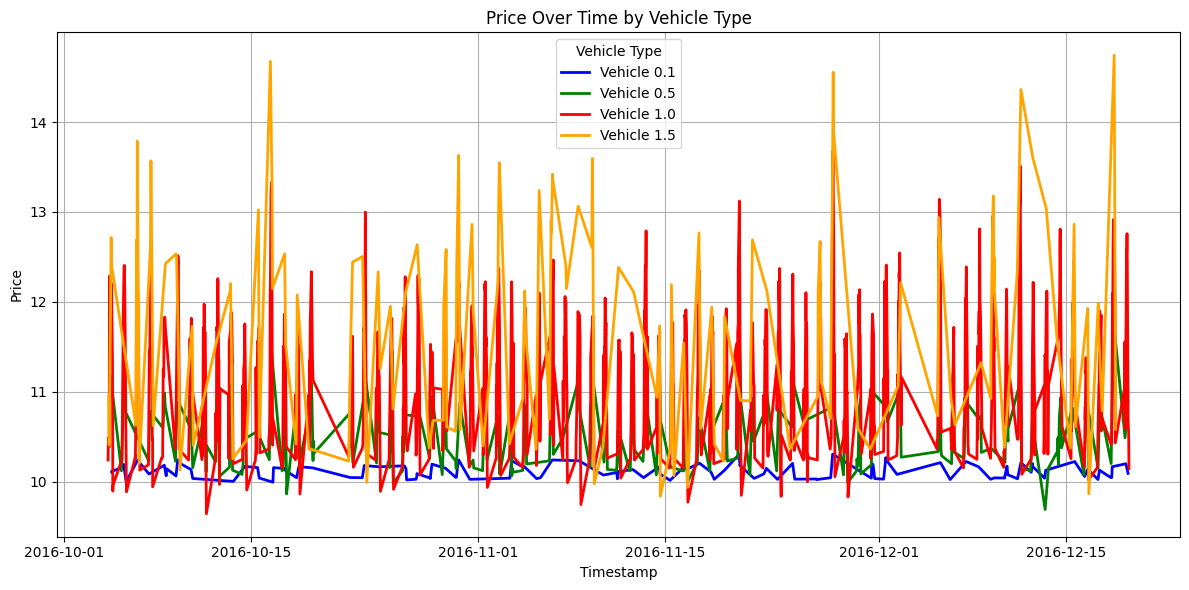

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 2. Parse timestamps and drop bad rows
file["timestam"] = pd.to_datetime(file["timestam"], errors="coerce")
file = file.dropna(subset=["timestam"])

# 3. Sort by time
file = file.sort_values("timestam")

# 4. Group by vehicle_type
groups = file.groupby("vehicle_type")

# 5. Plot all vehicle types on the same axes
plt.figure(figsize=(12, 6))
colors = ["blue", "green", "red", "orange", "purple", "brown", "cyan", "magenta"]

for i, (vt, grp) in enumerate(groups):
    plt.plot(
        grp["timestam"],
        grp["price"],
        label=f"Vehicle {vt}",
        color=colors[i % len(colors)],
        linewidth=2
    )

# 6. Final touches
plt.title("Price Over Time by Vehicle Type")
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.legend(title="Vehicle Type")
plt.grid(True)
plt.tight_layout()
plt.show()

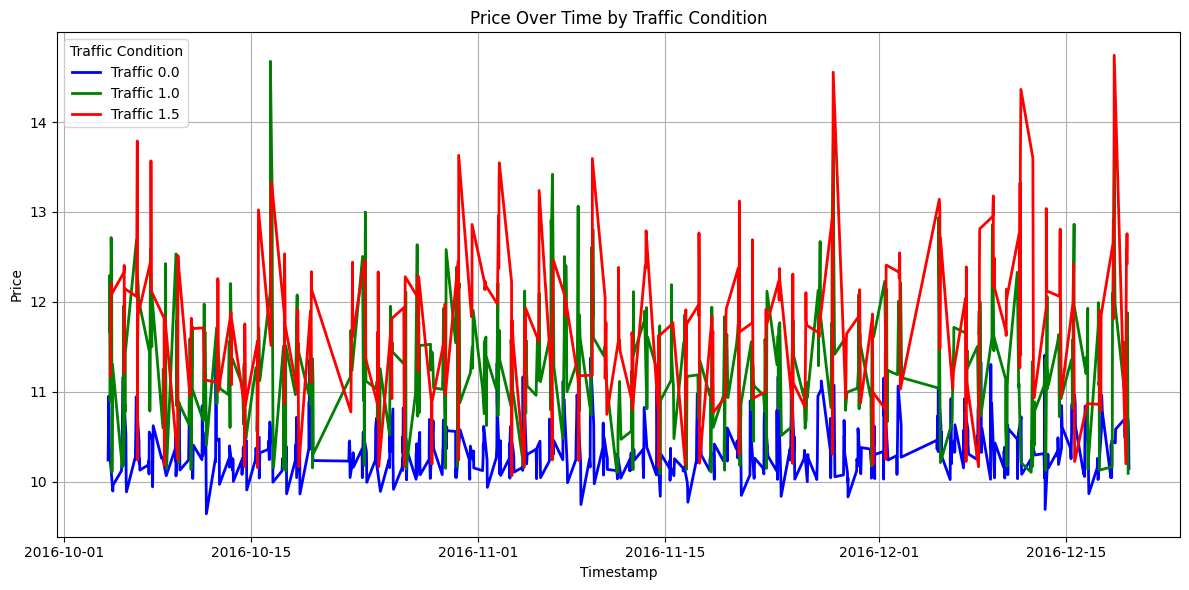

In [17]:


# 2. Parse timestamps and drop any bad rows
file["timestam"] = pd.to_datetime(file["timestam"], errors="coerce")
file = file.dropna(subset=["timestam"])

# 3. Sort by time
file = file.sort_values("timestam")

# 4. Group by traffic_condition
groups = file.groupby("traffic_condition")

# 5. Plot each traffic condition on the same axes
plt.figure(figsize=(12, 6))
colors = ["blue", "green", "red", "orange", "purple", "brown", "cyan", "magenta"]

for i, (tc, grp) in enumerate(groups):
    plt.plot(
        grp["timestam"],
        grp["price"],
        label=f"Traffic {tc}",
        color=colors[i % len(colors)],
        linewidth=2
    )

# 6. Final touches
plt.title("Price Over Time by Traffic Condition")
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.legend(title="Traffic Condition")
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
import zipfile
import os
import pandas as pd
import glob
from google.colab import files


extract_to = "model2"


# Step 2: Merge with source file name
all_dfs = []

# Get all CSV files recursively
csv_files = glob.glob(os.path.join(extract_to, "**/*.csv"), recursive=True)

for file in csv_files:
    df = pd.read_csv(file)
    df['source_file'] = os.path.basename(file)  # Add filename column
    all_dfs.append(df)

merged_df = pd.concat(all_dfs, ignore_index=True)

# Step 3: Save and download
merged_df.to_csv("merged_output_model2.csv", index=False)


In [19]:
import shutil
from google.colab import files

# Replace 'my_folder' with your folder name
shutil.make_archive('model1', 'zip', 'model1')

import zipfile
import os

zip_path = "model1.zip"  # Replace with your zip filename
extract_to = "unzipped_folder1"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)


import pandas as pd
import glob

# Get all CSV files recursively
csv_files = glob.glob(os.path.join(extract_to, "**/*.csv"), recursive=True)

# Read and merge
merged_df = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)

# Save to merged file
merged_df.to_csv("merged_output_model1.csv", index=False)

MODEL 3

In [20]:
# Haversine formula to compute distance (in km)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi/2.0)**2 + \
        np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

In [21]:
df = pd.read_csv('/content/merged_output_model2.csv')

In [22]:
# Step 1: Extract Latitude and Longitude using regex
df[['Latitude', 'Longitude']] = df['source_file'].str.extract(r'garage_([-\d\.]+)_([-\d\.]+)')

# Step 2: Convert to float
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)

# Step 3: Group Lat-Lon and assign group number
df['SystemCodeNumber'] = df.groupby(['Latitude', 'Longitude']).ngroup() + 1

df

,timestam,price,isspeciadday,traffic_condition,vehicle_type,occupancy,capacity,time,diff,source_file,Latitude,Longitude,SystemCodeNumber
0,2016-10-04T11:00:00.000000000,10.706560,0,1.0,0.5,1424.0,2009.0,1752411971560,1,garage_26.14747_91.72805_output.csv,26.14747,91.72805,7
1,2016-10-04T14:00:00.000000000,10.810543,0,1.5,0.5,1420.0,2009.0,1752411971560,1,garage_26.14747_91.72805_output.csv,26.14747,91.72805,7
2,2016-10-04T13:00:00.000000000,10.832966,0,1.5,0.5,1461.0,2009.0,1752411971560,1,garage_26.14747_91.72805_output.csv,26.14747,91.72805,7
3,2016-10-04T14:30:00.000000000,10.815733,0,1.0,1.0,1346.0,2009.0,1752411971560,1,garage_26.14747_91.72805_output.csv,26.14747,91.72805,7
4,2016-10-05T11:00:00.000000000,11.880611,0,1.5,1.0,1411.0,2009.0,1752411971560,1,garage_26.14747_91.72805_output.csv,26.14747,91.72805,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21530,2016-12-16T12:30:00.000000000,10.844878,0,1.5,0.5,514.0,687.0,1752411990704,1,garage_20.00003_78.00000_output.csv,20.00003,78.00000,1
21531,2016-12-18T11:30:00.000000000,11.979258,1,1.0,1.0,329.0,687.0,1752411990704,1,garage_20.00003_78.00000_output.csv,20.00003,78.00000,1
21532,2016-12-16T15:30:00.000000000,10.412966,0,0.0,1.0,534.0,687.0,1752411990704,1,garage_20.00003_78.00000_output.csv,20.00003,78.00000,1
21533,2016-12-19T15:00:00.000000000,10.092889,0,1.0,0.1,608.0,687.0,1752411990704,1,garage_20.00003_78.00000_output.csv,20.00003,78.00000,1


In [23]:
# Group by timestamp so we can compare all lots at the same time
timestamps = df['timestam'].unique()
lot_coords = df[['SystemCodeNumber', 'Latitude', 'Longitude']].drop_duplicates().set_index('SystemCodeNumber')

In [24]:
def competitive_pricing(df, demand_prices_df, radius_km=1.0):
    df = df.copy()
    df['CompAdjustedPrice'] = demand_prices_df['price']  # Start with demand-based price

    for ts in timestamps:
        current_df = df[df['timestam'] == ts].copy()

        for idx, row in current_df.iterrows():
            lot_id = row['SystemCodeNumber']
            lat1, lon1 = lot_coords.loc[lot_id]

            # Find nearby competitors
            competitors = []
            for comp_id in lot_coords.index:
                if comp_id == lot_id:
                    continue
                lat2, lon2 = lot_coords.loc[comp_id]
                dist = haversine(lat1, lon1, lat2, lon2)
                if dist <= radius_km:
                    competitors.append(comp_id)

            # Compare with competitor prices
            if competitors:
                comp_prices = current_df[current_df['SystemCodeNumber'].isin(competitors)]['price']
                avg_comp_price = comp_prices.mean()

                my_price = row['price']

                # Adjust based on competition
                if avg_comp_price < my_price:
                    new_price = my_price * 0.95  # drop slightly
                elif avg_comp_price > my_price:
                    new_price = my_price + 1.05  # raise slightly
                else:
                    new_price = my_price

                # Clip price
                df.loc[idx, 'CompAdjustedPrice'] = max(5, min(20, new_price))

    return df

In [25]:
final_df = competitive_pricing(df, df)

# Step 3: View the result
final_df

,timestam,price,isspeciadday,traffic_condition,vehicle_type,occupancy,capacity,time,diff,source_file,Latitude,Longitude,SystemCodeNumber,CompAdjustedPrice
0,2016-10-04T11:00:00.000000000,10.706560,0,1.0,0.5,1424.0,2009.0,1752411971560,1,garage_26.14747_91.72805_output.csv,26.14747,91.72805,7,11.756560
1,2016-10-04T14:00:00.000000000,10.810543,0,1.5,0.5,1420.0,2009.0,1752411971560,1,garage_26.14747_91.72805_output.csv,26.14747,91.72805,7,11.860543
2,2016-10-04T13:00:00.000000000,10.832966,0,1.5,0.5,1461.0,2009.0,1752411971560,1,garage_26.14747_91.72805_output.csv,26.14747,91.72805,7,11.882966
3,2016-10-04T14:30:00.000000000,10.815733,0,1.0,1.0,1346.0,2009.0,1752411971560,1,garage_26.14747_91.72805_output.csv,26.14747,91.72805,7,10.274946
4,2016-10-05T11:00:00.000000000,11.880611,0,1.5,1.0,1411.0,2009.0,1752411971560,1,garage_26.14747_91.72805_output.csv,26.14747,91.72805,7,11.286580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21530,2016-12-16T12:30:00.000000000,10.844878,0,1.5,0.5,514.0,687.0,1752411990704,1,garage_20.00003_78.00000_output.csv,20.00003,78.00000,1,10.844878
21531,2016-12-18T11:30:00.000000000,11.979258,1,1.0,1.0,329.0,687.0,1752411990704,1,garage_20.00003_78.00000_output.csv,20.00003,78.00000,1,11.979258
21532,2016-12-16T15:30:00.000000000,10.412966,0,0.0,1.0,534.0,687.0,1752411990704,1,garage_20.00003_78.00000_output.csv,20.00003,78.00000,1,10.412966
21533,2016-12-19T15:00:00.000000000,10.092889,0,1.0,0.1,608.0,687.0,1752411990704,1,garage_20.00003_78.00000_output.csv,20.00003,78.00000,1,10.092889


In [26]:
final_df.to_csv('final_df.csv', index=False)

In [27]:
import pandas as pd
import os

# Load full dataset
df = pd.read_csv("/content/final_df.csv")
df["timestam"] = pd.to_datetime(df["timestam"], errors='coerce') \
                    .dt.strftime("%Y-%m-%d %H:%M:%S")

# Create output directory
os.makedirs("model3", exist_ok=True)

# Group by unique garage locations (Lat, Long)
for (lat, lon), group in df.groupby(["Latitude", "Longitude"]):
    filename = f"model3/garage_{lat:.5f}_{lon:.5f}.csv"
    group.to_csv(filename, index=False)

print("✅ Done splitting into garage-wise files.")

✅ Done splitting into garage-wise files.


In [28]:
df1 = pd.read_csv('/content/model3/garage_20.00003_78.00000.csv')
df1

,timestam,price,isspeciadday,traffic_condition,vehicle_type,occupancy,capacity,time,diff,source_file,Latitude,Longitude,SystemCodeNumber,CompAdjustedPrice
0,2016-10-04 11:00:00,10.896269,0,1.0,0.5,604.0,687.0,1752411971560,1,garage_20.00003_78.00000_output.csv,20.00003,78.0,1,10.896269
1,2016-10-04 14:00:00,12.397733,0,1.0,1.5,627.0,687.0,1752411971560,1,garage_20.00003_78.00000_output.csv,20.00003,78.0,1,12.397733
2,2016-10-06 15:00:00,10.459963,0,0.0,1.5,547.0,687.0,1752411971560,1,garage_20.00003_78.00000_output.csv,20.00003,78.0,1,10.459963
3,2016-10-05 14:30:00,10.780596,0,1.0,0.5,620.0,687.0,1752411971560,1,garage_20.00003_78.00000_output.csv,20.00003,78.0,1,10.780596
4,2016-10-04 13:00:00,12.715821,0,1.0,1.5,651.0,687.0,1752411971560,1,garage_20.00003_78.00000_output.csv,20.00003,78.0,1,12.715821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1528,2016-12-16 12:30:00,10.844878,0,1.5,0.5,514.0,687.0,1752411990704,1,garage_20.00003_78.00000_output.csv,20.00003,78.0,1,10.844878
1529,2016-12-18 11:30:00,11.979258,1,1.0,1.0,329.0,687.0,1752411990704,1,garage_20.00003_78.00000_output.csv,20.00003,78.0,1,11.979258
1530,2016-12-16 15:30:00,10.412966,0,0.0,1.0,534.0,687.0,1752411990704,1,garage_20.00003_78.00000_output.csv,20.00003,78.0,1,10.412966
1531,2016-12-19 15:00:00,10.092889,0,1.0,0.1,608.0,687.0,1752411990704,1,garage_20.00003_78.00000_output.csv,20.00003,78.0,1,10.092889


In [29]:
import os
from datetime import timedelta
import pathway as pw
import panel as pn
import bokeh.plotting

pn.extension()
all_viz = []

garage_files = os.listdir("model3")


# For multiple pipelines, each pipeline inside function
for file in garage_files:
    path = f"model3/{file}"
    print(f"▶️ Running for: {file}")

    def build_graph(path, garage_name):
        class Schema(pw.Schema):
            timestam: str
            price: float

        data = pw.demo.replay_csv(path, schema=Schema, input_rate=100)
        data = data.with_columns(
            t = data.timestam.dt.strptime("%Y-%m-%d %H:%M:%S")
        )

        data = data.with_columns(
            t = pw.apply(lambda t: t.replace(minute=(t.minute // 30) * 30, second=0, microsecond=0), pw.this.t)
        )

        final_price_table = data.select(
            t = pw.this.t,
            model3_price = pw.this.price
        )
        def price_plotter(source):
            fig = bokeh.plotting.figure(
                height=300,
                width=700,
                title=f"Garage: {garage_name} (Model 3)",
                x_axis_type="datetime",
            )
            fig.line("t", "model3_price", source=source, line_width=2, color="green")
            fig.scatter("t", "model3_price", source=source, size=6, color="orange")
            return fig

        return final_price_table.plot(price_plotter, sorting_col="t")

    # Add this garage's graph
    all_viz.append(build_graph(path, file))

# Combine all visualisations
pn.Column(*all_viz).servable()

▶️ Running for: garage_26.14749_91.72800.csv
▶️ Running for: garage_26.14005_91.73097.csv
▶️ Running for: garage_26.15050_91.73353.csv
▶️ Running for: garage_26.14750_91.72800.csv
▶️ Running for: garage_26.14750_91.72798.csv
▶️ Running for: garage_26.14755_91.72800.csv
▶️ Running for: garage_20.00003_78.00000.csv
▶️ Running for: garage_26.14001_91.73100.csv
▶️ Running for: garage_26.14754_91.72797.csv
▶️ Running for: garage_26.14902_91.73950.csv
▶️ Running for: garage_26.14449_91.73621.csv
▶️ Running for: garage_26.14454_91.73617.csv
▶️ Running for: garage_26.14747_91.72805.csv
▶️ Running for: garage_26.13796_91.74099.csv


Column
    [0] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [1] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [2] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [3] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [4] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [5] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [6] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [7] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [8] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [9] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [10] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [11] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [12] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)
    [13] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)

In [30]:
pw.run()

Output()

EVALUATION METRICS

In [31]:
model1 = pd.read_csv('/content/merged_output_model1.csv')
model2 = pd.read_csv('/content/merged_output_model2.csv')
model3 = pd.read_csv('/content/final_df.csv')

price_model1 = model1['price']
price_model2 = model2['price']
price_model3 = model3['CompAdjustedPrice']

performance_metrics = {
    "Model": ["Model1", "Model 2", "Model 3"],
    "Average Price": [price_model1.mean(),price_model2.mean(), price_model3.mean()],
    "Std Dev (Price)": [price_model1.std(),price_model2.std(), price_model3.std()],
    "Min Price": [price_model1.min(),price_model2.min(), price_model3.min()],
    "Max Price": [price_model1.max(),price_model2.max(), price_model3.max()],
    "Occupancy vs Price Correlation": [
        model1["occupancy"].corr(price_model1),
        model2["occupancy"].corr(price_model2),
        model3["occupancy"].corr(price_model3)
    ],
    "Total Estimated Revenue" : [
        (model1["price"]*model1["occupancy"]).sum(),
        (model2["price"]*model2["occupancy"]).sum(),
        (model3["CompAdjustedPrice"]*model3["occupancy"]).sum()
    ]
}

performance_df = pd.DataFrame(performance_metrics)
performance_df

,Model,Average Price,Std Dev (Price),Min Price,Max Price,Occupancy vs Price Correlation,Total Estimated Revenue
0,Model1,11.125455,0.623219,8.899563,15.080103,0.193990,1.769259e+08
1,Model 2,10.935006,0.784592,9.122451,17.807647,0.084189,1.731925e+08
2,Model 3,11.217106,0.714274,9.453583,16.917265,0.010254,1.768535e+08


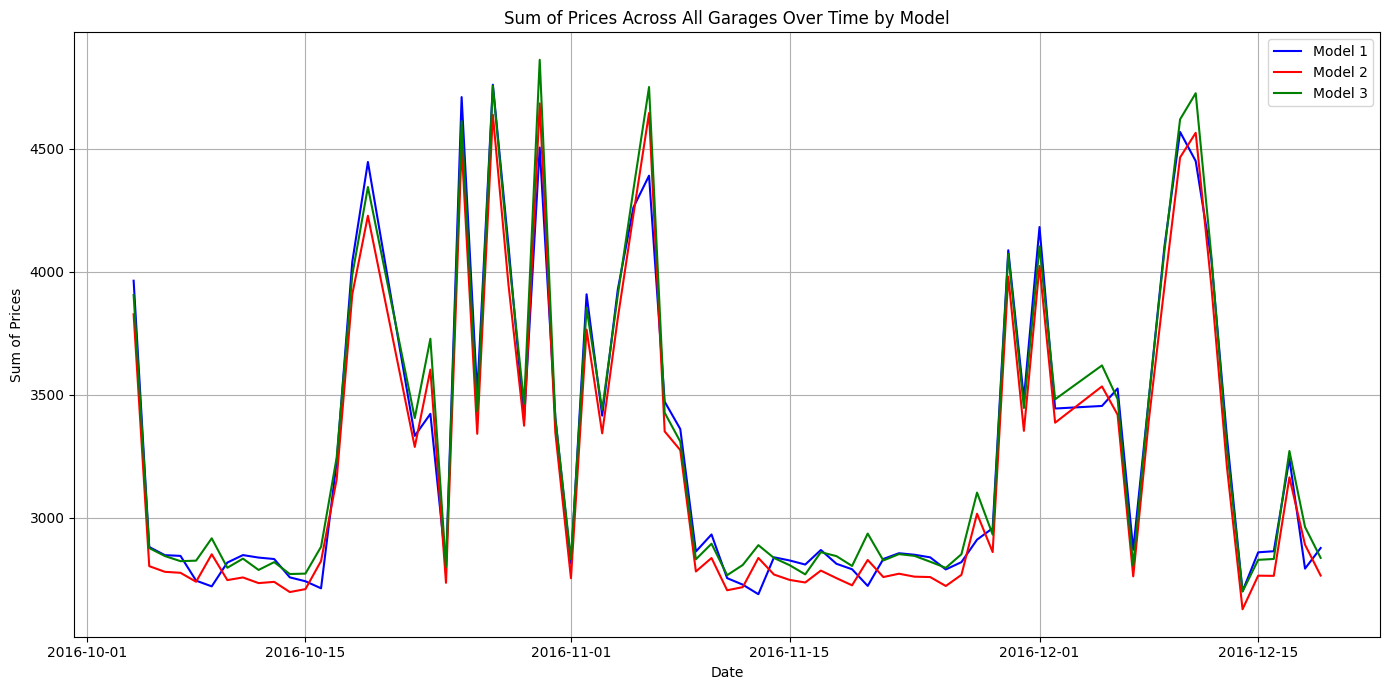

In [32]:
# Ensure 'timestam' is in datetime format for all models
model1['timestam'] = pd.to_datetime(model1['timestam'], errors='coerce')
model2['timestam'] = pd.to_datetime(model2['timestam'], errors='coerce')
model3['timestam'] = pd.to_datetime(model3['timestam'], errors='coerce')

# Extract date
model1['date'] = model1['timestam'].dt.date
model2['date'] = model2['timestam'].dt.date
model3['date'] = model3['timestam'].dt.date

# Group by date and sum the prices
daily_price_model1 = model1.groupby('date')['price'].sum().reset_index()
daily_price_model2 = model2.groupby('date')['price'].sum().reset_index()
daily_price_model3 = model3.groupby('date')['CompAdjustedPrice'].sum().reset_index()

# Convert date back to datetime for plotting
daily_price_model1['date'] = pd.to_datetime(daily_price_model1['date'])
daily_price_model2['date'] = pd.to_datetime(daily_price_model2['date'])
daily_price_model3['date'] = pd.to_datetime(daily_price_model3['date'])


# Plotting
plt.figure(figsize=(14, 7))

plt.plot(daily_price_model1['date'], daily_price_model1['price'], label='Model 1', color='blue')
plt.plot(daily_price_model2['date'], daily_price_model2['price'], label='Model 2', color='red')
plt.plot(daily_price_model3['date'], daily_price_model3['CompAdjustedPrice'], label='Model 3', color='green')


plt.title('Sum of Prices Across All Garages Over Time by Model')
plt.xlabel('Date')
plt.ylabel('Sum of Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()